In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [0]:
import numpy as np

In [4]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 784)
Test data shape (10000, 784)


In [5]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (60000, 784)
Test data shape (10000, 784)


In [0]:
# Function to extract the classes
def extract_2classes(class0, class1, X, Y):
    # Select class #0
    X_0 = X[Y == class0]
    Y_0 = Y[Y == class0]
    # Select class #1
    X_1 = X[Y == class1]
    Y_1 = Y[Y == class1]
    # Join the two classes to make the set
    X_2classes = np.vstack((X_0, X_1))
    Y_2classes = np.append(Y_0, Y_1)
    return X_2classes, Y_2classes

In [0]:
X_train_2classes, Y_train_2classes = extract_2classes(5, 7, x_train, y_train)
X_test_2classes, Y_test_2classes = extract_2classes(5, 7,x_test, y_test)

In [8]:
print("Training data shape: ", X_train_2classes.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", X_test_2classes.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (11686, 784)
Test data shape (1920, 784)


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

def predict(train_features,test_features,train_labels): 
    clf = Perceptron(tol=1e-3, random_state=0)
    # Fitting the data into the model
    clf.fit(train_features, train_labels)
    # Predicting the labels for test data
    predicted_values = clf.predict(test_features)
    return predicted_values
    
def calc_accuracy(train_features,test_features,train_labels,test_labels):
    # Calling predict function to get the predicted labels of test data
    pred = predict(train_features,test_features,train_labels)
    return accuracy_score(pred, test_labels)
  

In [11]:
calc_accuracy(X_train_2classes,X_test_2classes,Y_train_2classes,Y_test_2classes)

0.9895833333333334

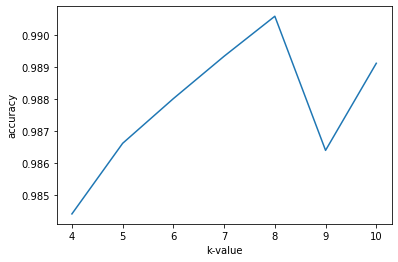

In [27]:
# k fold cross validation
import matplotlib.pyplot as plt
accuracies = []
X_data = np.concatenate((X_train_2classes, X_test_2classes))
Y_data = np.concatenate((Y_train_2classes, Y_test_2classes))
s = X_data.shape[0]

for k in range(4, 11):
  accuracy = 0
  for i in range(k):
    p = [int(s*(i/k)), int(s*((i+1)/k))]
    X_validate = X_data[p[0]:p[1]]
    Y_validate = Y_data[p[0]:p[1]]
    X_train = np.concatenate((X_data[:p[0]], X_data[p[1]:]))
    Y_train = np.concatenate((Y_data[:p[0]], Y_data[p[1]:]))
    accuracy += calc_accuracy(X_train,X_validate,Y_train,Y_validate)
  accuracies.append(accuracy/k)

kvalue = [i for i in range(4,11)]
plt.plot(kvalue, accuracies)
plt.xlabel('k-value')
plt.ylabel('accuracy')
plt.show()